### Clustering poverty levels in Lampung Province using the K Means Clustering algorithm

import the required library

In [67]:
import pandas as pd
df = pd.read_excel("Miskin.xlsx")
df.head()

,Wilayah,Warga Miskin 2020,Warga Miskin 2021,Warga Miskin 2022,Populasi 2020,Populasi 2021,Populasi 2022
0,Bandar Lampung,39360,98760000,90510,1166066,1184949,1209937
1,Lampung Barat,38120,39360,36200,302139,302749,303397
2,Lampung Selatan,143330,145850,136210,1064301,1071727,181115
3,Lampung Tengah,152280,155770,143340,1460045,1477395,1500022
4,Lampung Timur,153570,159790,149120,1110340,1118115,1127946


Preprocessing data

In [68]:
df["mean_miss"] = df.iloc[:, 1:4].mean(axis=1)
df["mean_pop"] = df.iloc[:, 4:7].mean(axis=1)
df = df.sort_values(by=['mean_pop'], ascending=False)
df = df.drop(index=df.iloc[0].name)
df

,Wilayah,Warga Miskin 2020,Warga Miskin 2021,Warga Miskin 2022,Populasi 2020,Populasi 2021,Populasi 2022,mean_miss,mean_pop
3,Lampung Tengah,152280,155770,143340,1460045,1477395,1500022,1.504633e+05,1.479154e+06
0,Bandar Lampung,39360,98760000,90510,1166066,1184949,1209937,3.296329e+07,1.186984e+06
4,Lampung Timur,153570,159790,149120,1110340,1118115,1127946,1.541600e+05,1.118800e+06
2,Lampung Selatan,143330,145850,136210,1064301,1071727,181115,1.417967e+05,7.723810e+05
12,Tanggamus,70370,71890,67430,640275,645807,652898,6.989667e+04,6.463267e+05
5,Lampung Utara,119350,121910,114670,633099,634117,635129,1.186433e+05,6.341150e+05
8,Pesawaran,66040,68310,63170,477468,481708,487153,6.584000e+04,4.821097e+05
15,Way Kanan,58410,59890,54280,473575,476871,481036,5.752667e+04,4.771607e+05
13,Tulang Bawang,42430,44530,39190,430021,430630,431208,4.205000e+04,4.306197e+05
10,Pringsewu,40120,41040,38180,405466,406823,408415,3.978000e+04,4.069013e+05


Get avarage of population and amount of the poverty 

In [89]:
df.mean_miss = df["mean_miss"].astype(int)
df.mean_pop = df["mean_pop"].astype(int)
df

,Wilayah,Warga Miskin 2020,Warga Miskin 2021,Warga Miskin 2022,Populasi 2020,Populasi 2021,Populasi 2022,mean_miss,mean_pop
3,Lampung Tengah,152280,155770,143340,1460045,1477395,1500022,1479154,1479154
0,Bandar Lampung,39360,98760000,90510,1166066,1184949,1209937,1186984,1186984
4,Lampung Timur,153570,159790,149120,1110340,1118115,1127946,1118800,1118800
2,Lampung Selatan,143330,145850,136210,1064301,1071727,181115,772381,772381
12,Tanggamus,70370,71890,67430,640275,645807,652898,646326,646326
5,Lampung Utara,119350,121910,114670,633099,634117,635129,634115,634115
8,Pesawaran,66040,68310,63170,477468,481708,487153,482109,482109
15,Way Kanan,58410,59890,54280,473575,476871,481036,477160,477160
13,Tulang Bawang,42430,44530,39190,430021,430630,431208,430619,430619
10,Pringsewu,40120,41040,38180,405466,406823,408415,406901,406901


scatter plot of each region

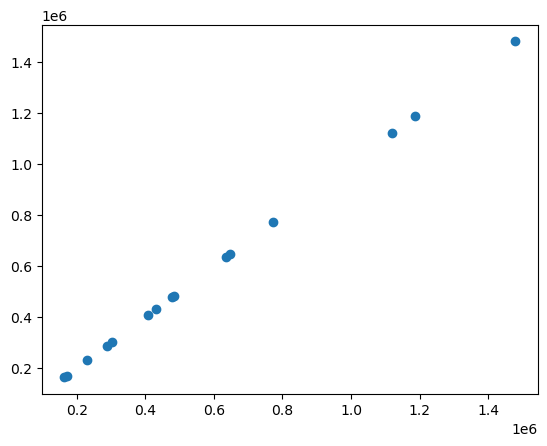

In [82]:
import matplotlib.pyplot as plt

x = df["mean_miss"]
y = df["mean_pop"]

plt.scatter(x, y)
plt.show() 

finding number of cluster using Elbow

c:\Users\a c e r\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a c e r\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\a c e r\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a c e r\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

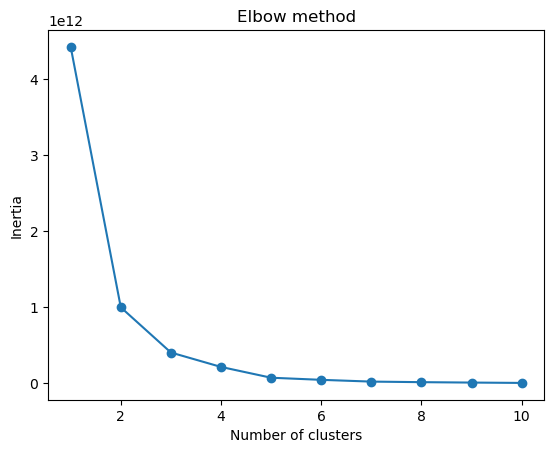

In [90]:
from sklearn.cluster import KMeans

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

ploting data in 2 cluster

c:\Users\a c e r\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a c e r\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


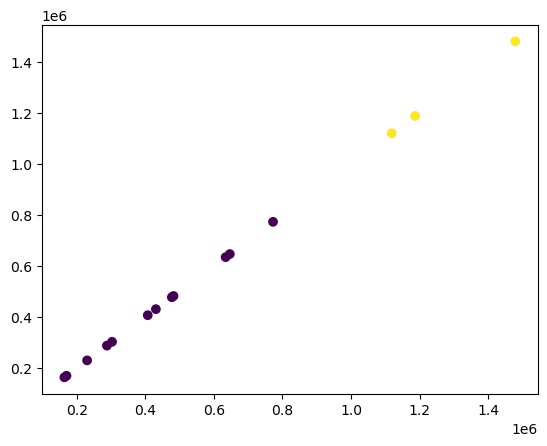

In [91]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)

plt.show() 

Final Result 

c:\Users\a c e r\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\a c e r\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


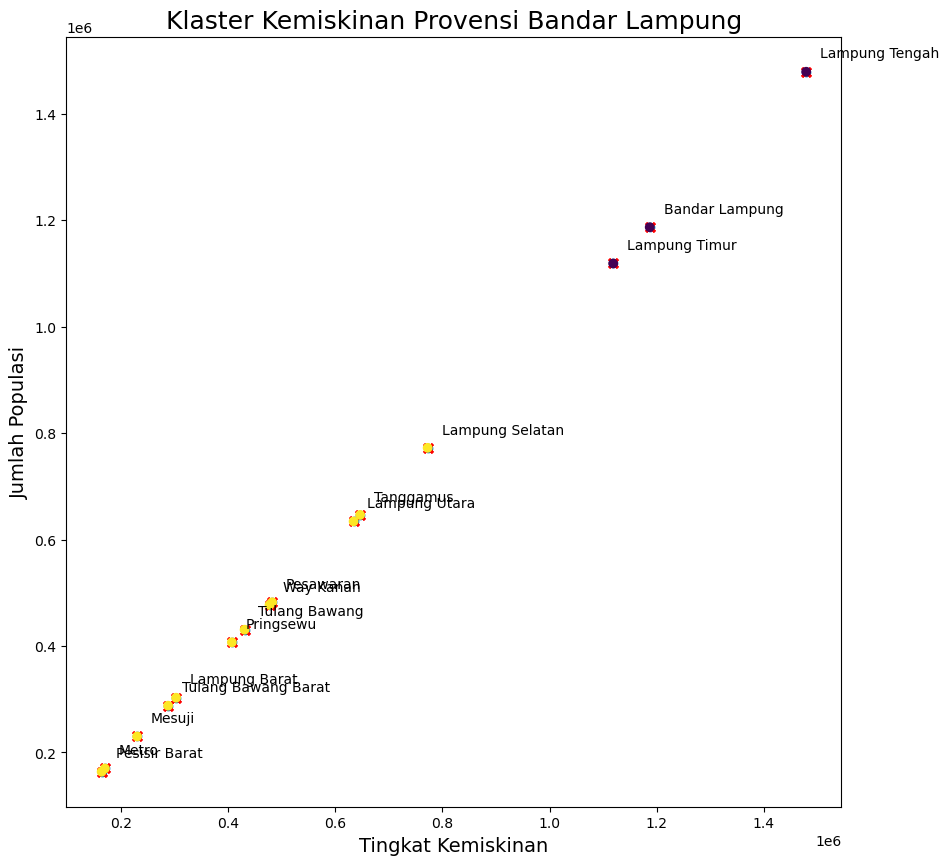

In [92]:
x = df["mean_miss"].values
y = df["mean_pop"].values
types = df['Wilayah'].values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

ax.set_xlabel('Tingkat Kemiskinan', fontsize=14)
ax.set_ylabel('Jumlah Populasi', fontsize=14)
ax.set_title('Klaster Kemiskinan Provensi Bandar Lampung', fontsize=18)

for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='red')
    
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show() 